In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg

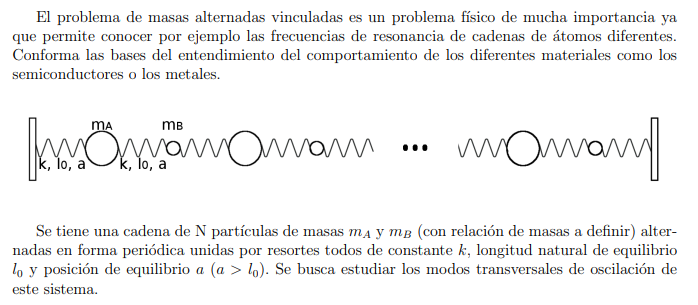

Para obtener las ecuaciones de Newton para N masitas, primeramente analizamos la masa del extremo izquierdo quitándola del equilibrio y luego generalizamos las ecuaciones valiéndonos de la periodicidad en el que las masas aparecían.

Al ser un movimiento transversal, la masa solo se moverá verticalmente. Entonces, vamos a buscar las proyecciones de las fuerzas elásticas que sufren cada masita en el eje y. Para resolver el ejercicio, vamos a considerar un sistema de coordenadas ubicandonos en el punto de equilibrio de cada masita.

Si corremos a la masa 1 del equilibrio, como se observa en la figura 1, vemos que actúan dos fuerzas elásticas sobre ella: una en su extremo izquierdo y la otra en el derecho. Para hallar sus componentes en el eje y vamos a aplicar trigonometría.

Por un lado, sabemos que el ¿estiramiento? del resorte 1 se escribe como:
$\sqrt{\psi_1^{2} + a^{2} } - lo$. Por otro lado, el del resorte 2 queda expresado como: $\sqrt{(\psi_2-\psi_1^{2})^{2} + a^{2} } - lo$.

Para buscar sus componentes en el eje vertical, sabemos que $\Large cos(\theta_1 )=\frac{\psi_1}{\sqrt{\psi_1^{2}+a^2}}$ y $\Large cos(\theta_2 )=\frac{\psi_2-\psi_1}{\sqrt{(\psi_2-\psi_1^{2})^{2}+a^2}}$

Entonces, las expresiones de las ecuaciones de movimiento para la masa 1 nos queda:

$ m_1\ddot{\psi_1} = -k(\sqrt{\psi_1^{2} + a^{2} } - lo)\frac{\psi_1}{\sqrt{\psi_1^{2}+a^2}}+ k(\sqrt{(\psi_2-\psi_1^{2})^{2} + a^{2} } - lo)\frac{(\psi_2-\psi_1)}{\sqrt{(\psi_2-\psi_1^{2})^{2}+a^2}}$ y reordenando:
$m_1\ddot{\psi_1} = -k(1 - \frac{lo}{\sqrt{\psi_1^{2}+a^2}})\psi_1+ k(1 - \frac{lo}{\sqrt{(\psi_2-\psi_1)^{2}+a^2}})(\psi_2-\psi_1)(1)$

Como no es una ecuación diferencial lineal, hacemos un desarrollo de Taylor. Primero, sacando de factor común "a" en el denominador obtenemos: 
$\large \frac{\psi_1}{a\sqrt{\frac{\psi_1^2}{a^2}+1}}(2)$ y $\large  \frac{\psi_2 - \psi_1}{a\sqrt{\frac{(\psi_2 - \psi_1)^{2}}{a}+1}}(3)$.

Y ahora, tomando $\varepsilon_1=\frac{\psi_1^2}{a^2}$ para la expresión (2) hacemos una aproximación de Taylor para oscilaciones pequeñas a la función $f$ = $\frac{1}{\sqrt{\varepsilon+1}}$. Luego nos queda:

$f = f(0) + f'(0)\psi= 1 +....+$  donde nos quedamos sólo con el resultado de primer orden.

Repetimos lo mismo con la expresión (3) y la ecuación diferencial resulta:
$m_1\ddot{\psi_1} = -\tilde{k}\psi_1 + \tilde{k}(\psi_2 - \psi_1)$, con $\tilde{k} \equiv k(1-\frac{lo}{a})$.

Si repetimos lo mismo para la segunda masa, ahora tendremos:
$m_2\ddot{\psi_2} = \tilde{k}(\psi_3 - \psi_2) - \tilde{k}(\psi_2 - \psi_1)$, con $\tilde{k} \equiv k(1-\frac{lo}{a})$.

Entonces, generalizando, tenemos que las ecuaciones diferenciales que describen el momivimiento del sistema resultan de este estilo:

$ m_n\ddot{\psi_n} = -2\tilde{k}\psi _n +\tilde{k}\psi_{n+1} +\tilde{k}\psi_{n-1} $ con n siendo el número de masita. Si n es impar entonces corresponde a una masa a, de lo contrario una masa b.

La última masa es una de tipo b y su ecuación de movimiento resulta igual que la primera.


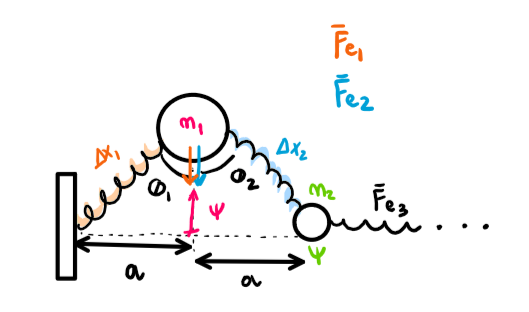
Figura 1: DCL masa 1.

LLevamos la notación a un sistema matricial y tenemos:
$\ddot{\vec{\psi}} = -\bar{M}\vec{\psi}$, $\; \ddot{\vec{\psi}}$ el vector aceleración, $\vec{\psi}$ el vector posición y M tal que

$M = \begin{pmatrix}
 2\frac{\tilde{k}}{m_a} &-\frac{\tilde{k}}{m_a} & 0  &\cdots  &\cdots    &0 &0\\
 \frac{-\tilde{k}}{m_b} &2\frac{\tilde{k}}{m_b}  &-\frac{\tilde{k}}{m_b}  &0 &\cdots &\cdots &0 \\ 
 0  &\frac{-\tilde{k}}{m_a} &2\frac{\tilde{k}}{m_a}  &\frac{-\tilde{k}}{m_a}  &0 &\cdots &0 \\ 
 \vdots   &0  &\ddots  &\ddots  &\ddots &&\vdots \\ 
 \vdots   &\vdots   &  &  &&&\vdots\\ 
 0 &\vdots  &  &  &  &&\vdots  \\ 
 0  &0  &\cdots  &\cdots   &0  &\frac{-\tilde{k}}{m_b} &2\frac{\tilde{k}}{m_b}
\end{pmatrix}$


Podemos resolver este sistema hallando los autovalores y autovectores de la matriz M, de esta manera podemos desacoplar las ecuaciones de movimiento y proponer $\psi = Acos(\omega t + \varphi )$ como solución.


In [4]:
#declaramos nuestras variables
t = np.linspace(0,np.pi*2,1000)
g = 9.8 #m/s**2
k = 0.8 #kg/s**2
L0 = 0.05 #m
R = 0.02 #m
a = 0.20 #m
k_moño = k*(1-L0/a) #kg/s**2

In [5]:
def ecuaciones_de_newton_matricial(n,ma,mb): #cant de masas, cuanto masa tienen
  #No funciona para matrices de 2x2
  matriz_m = np.repeat(0.0,n*n).reshape(n,n) #armamos nuestra matriz de n*n llena de 0

  for i in range(1, n-1): #Esto lo que va a hacer es recorrer la matriz y ubicar las constantes en las posiciones que corresponde PERO no toma los bordes
        if i % 2 == 0:
          matriz_m[(i, i)] = 2*k_moño/ma
          matriz_m[(i, i - 1)] = -1*k_moño/ma 
          matriz_m[(i, i + 1)] = -1*k_moño/ma
        else:
          matriz_m[(i, i)] = 2*k_moño/mb 
          matriz_m[(i, i - 1)] = -1*k_moño/mb 
          matriz_m[(i, i + 1)] = -1*k_moño/mb 

  #Ahora arreglamos manualmente los bordes que son el problema
  matriz_m[(0,0)] = 2*k_moño/ma
  matriz_m[(0,1)] = -1*k_moño/ma   

  matriz_m[(n-1,n-1)] = 2*k_moño/mb
  matriz_m[(n-1,n-2)] = -1*k_moño/mb
  return matriz_m

In [6]:
def modos_normales(matriz):
  autovalores, autovectores = scipy.linalg.eig(matriz)
  #Como numpy no te entrega los autovalores ordenados, los ordenamos(valga la redundancia) de menor a mayor.
  indice = autovalores.argsort()[::] 
  frecuencias = np.sqrt(autovalores[indice])
  modos = autovectores[:, indice]

  return frecuencias, modos

In [7]:
#primera parte
#ma = mb
caso1 = ecuaciones_de_newton_matricial(10,1,5)
modos = modos_normales(caso1)
modo_cuatro_frec = modos[0][3]
modo_cuatro_autovec = modos[1][3]